# Proyek Predictive Analytics: Weather-Prediction
- Nama: Rezaldi
- Email: rezaldi30082003@students.amikom.ac.id
- Id Dicoding: rezaldi_20113717
- Dataset: https://www.kaggle.com/datasets/ananthr1/weather-prediction

## Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
# Load dataset
df = pd.read_csv("seattle-weather.csv")

# Preview dataset
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


DataFrame berisi 6 kolom. Kolom-kolom tersebut adalah:
- date: menunjukkan tanggal pengamatan cuaca.
- precipitation: menunjukkan jumlah curah hujan.
- temp_max: menunjukkan suhu maksimum.
- temp_min: menunjukkan suhu minimum.
- wind: menunjukkan kecepatan angin.
- weather: menunjukkan kondisi cuaca.

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


tipe data date dan weather adalah objek. mungkin bisa dikonversi ke datetime dan tipe data kategori untuk analisis yang lebih baik.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['weather'] = df['weather'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 58.8 KB


dari hasil diatas sudah menampilkan perubahan tipe data date dan weather

In [6]:
# Statistik Deskriptif
df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


- precipitation: Jumlah rata-rata curah hujan adalah sekitar 3,03, menunjukkan fluktuasi yang patut dicatat (standar deviasi sekitar 6,68). Data yang berkaitan dengan curah hujan berkisar dari 0 hingga 55,9.
- temp_max: suhu maksimum rata-rata kira-kira 16,44, dengan jumlah variasi yang sederhana (standar deviasi sekitar 7,35). Suhu maksimum berfluktuasi antara -1,6 hingga 35,6.
- temp_min: suhu minimum rata-rata adalah sekitar 8,23, dengan variasi sedang (standar deviasi sekitar 5,02). Suhu minimum berosilasi antara -7,1 hingga 18,3.
- wind: kecepatan angin rata-rata sekitar 3,24, dengan jumlah variasi sedang (standar deviasi sekitar 1,44). Kecepatan angin berkisar dari 0,4 hingga 9,5.

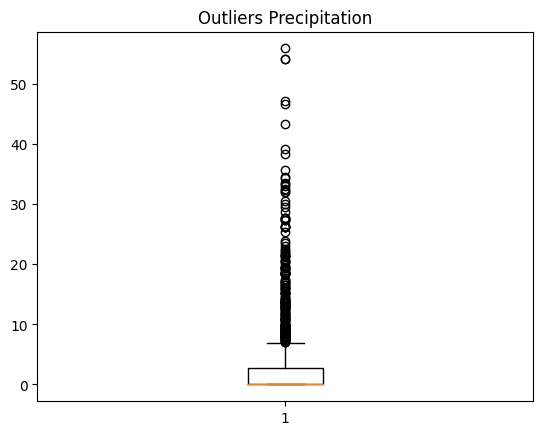

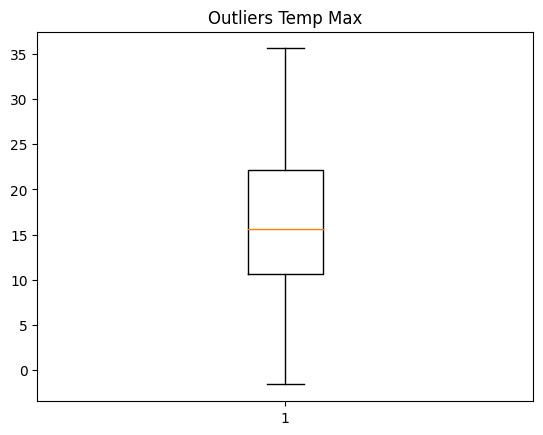

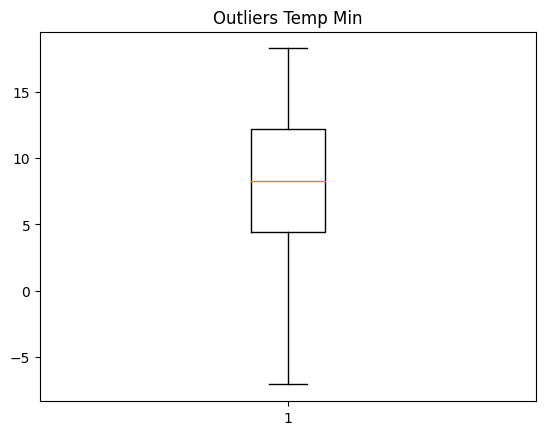

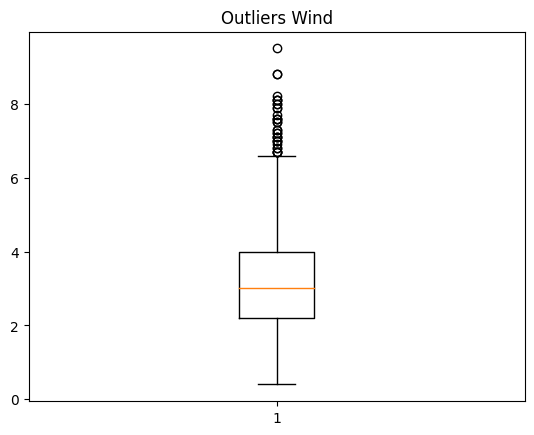

In [7]:
# Check outliers precipitation
plt.boxplot(df["precipitation"])
plt.title("Outliers Precipitation")
plt.show()

# Check outliers temp_max
plt.boxplot(df["temp_max"])
plt.title("Outliers Temp Max")
plt.show()

# Check outliers temp_min
plt.boxplot(df["temp_min"])
plt.title("Outliers Temp Min")
plt.show()

# Check outliers wind
plt.boxplot(df["wind"])
plt.title("Outliers Wind")
plt.show()

Berdasarkan output boxplot, dapat dilihat bahwa terdapat outlier pada precipitation dan wind.

In [11]:
# Menghitung IQR untuk precipitation
Q1_precip = df["precipitation"].quantile(0.25)
Q3_precip = df["precipitation"].quantile(0.75)
IQR_precip = Q3_precip - Q1_precip

# Menghitung batas atas dan batas bawah untuk precipitation
upper_bound_precip = Q3_precip + 1.5 * IQR_precip
lower_bound_precip = Q1_precip - 1.5 * IQR_precip

# Mengidentifikasi outlier dalam precipitation
precip_outliers = df[(df["precipitation"] > upper_bound_precip) | (df["precipitation"] < lower_bound_precip)]

# Menghitung IQR untuk wind
Q1_wind = df["wind"].quantile(0.25)
Q3_wind = df["wind"].quantile(0.75)
IQR_wind = Q3_wind - Q1_wind

# Menghitung batas atas dan batas bawah untuk wind
upper_bound_wind = Q3_wind + 1.5 * IQR_wind
lower_bound_wind = Q1_wind - 1.5 * IQR_wind

# Mengidentifikasi outlier dalam wind
wind_outliers = df[(df["wind"] > upper_bound_wind) | (df["wind"] < lower_bound_wind)]

# Menampilkan outlier precipitation
print("Precipitation Outliers:")
print(precip_outliers["precipitation"])

# Menampilkan outlier wind
print("\nWind Outliers:")
print(wind_outliers["wind"])

Precipitation Outliers:
Series([], Name: precipitation, dtype: float64)

Wind Outliers:
Series([], Name: wind, dtype: float64)


Berdasrkan output telah berhasil menghapus outliers di precipitation dan wind

In [12]:
# Memisahkan numerical features dan categorical features
numerical_features = df.select_dtypes(include=['float64'])  # Memilih kolom-kolom dengan tipe data float64
categorical_features = df.select_dtypes(include=['category'])  # Memilih kolom-kolom dengan tipe data category

# Menampilkan numerical features
print("Numerical Features:")
print(numerical_features.head())

# Menampilkan categorical features
print("\nCategorical Features:")
print(categorical_features.head())

Numerical Features:
   precipitation  temp_max  temp_min  wind
0            0.0      12.8       5.0   4.7
1            7.0      10.6       2.8   4.5
2            0.8      11.7       7.2   2.3
3            7.0      12.2       5.6   4.7
4            1.3       8.9       2.8   6.1

Categorical Features:
   weather
0  drizzle
1     rain
2     rain
3     rain
4     rain


berdasarkan output diatas telah berhasil memisahkan dataset berdasarkan kategori yaitu Numerical Features dan Categorical Features

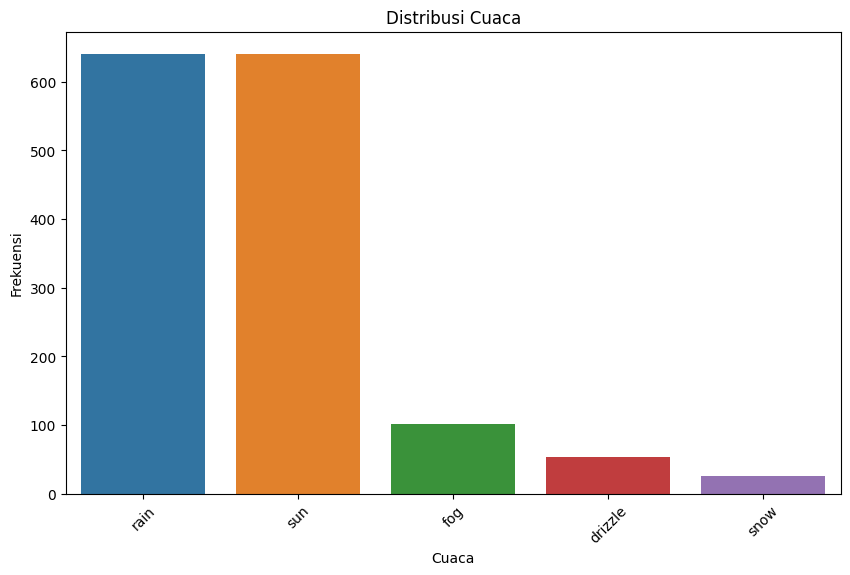

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather', order=weather_counts.index)
plt.title('Distribusi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

- Kategori cuaca yang paling sering muncul dalam dataset adalah "rain"
- Kategori cuaca "sun" memiliki kemunculan yang hampir sama dengan "rain"
- Kategori cuaca "fog" memiliki kemunculan yang lebih sedikit dibandingkan dengan "rain" dan "sun"
- "drizzle" dan "snow" adalah kategori cuaca yang lebih jarang terjadi

C:\Users\Rezal\AppData\Local\Temp\ipykernel_29220\2028473378.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='date', y='temp_max', hue='weather', ci=None)


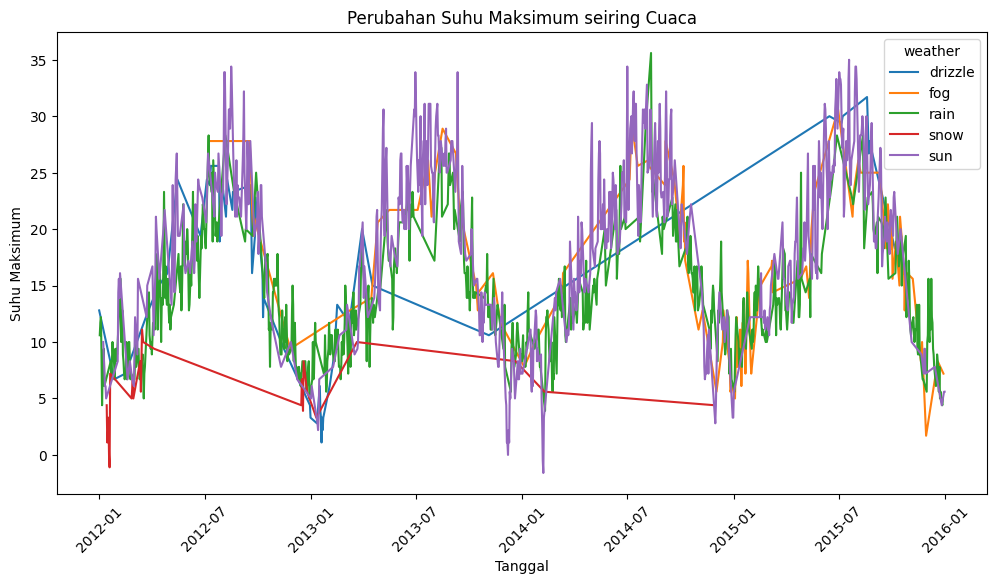

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temp_max', hue='weather', ci=None)
plt.title('Perubahan Suhu Maksimum seiring Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Suhu Maksimum')
plt.xticks(rotation=45)
plt.show()

Dengan output ini, dapat memahami bagaimana variabel cuaca memengaruhi variabel suhu.

In [19]:
numerical_features = numerical_features.describe()
print(numerical_features)

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        1.685421    16.439083     8.234771     3.222177
std         2.610094     7.349758     5.023004     1.381973
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max         7.000000    35.600000    18.300000     6.700000


Output yang ditampilkan adalah hasil dari penghitungan statistik deskriptif untuk fitur-fitur numerik, yang meliputi "precipitation," "temp_max," "temp_min," dan "wind."

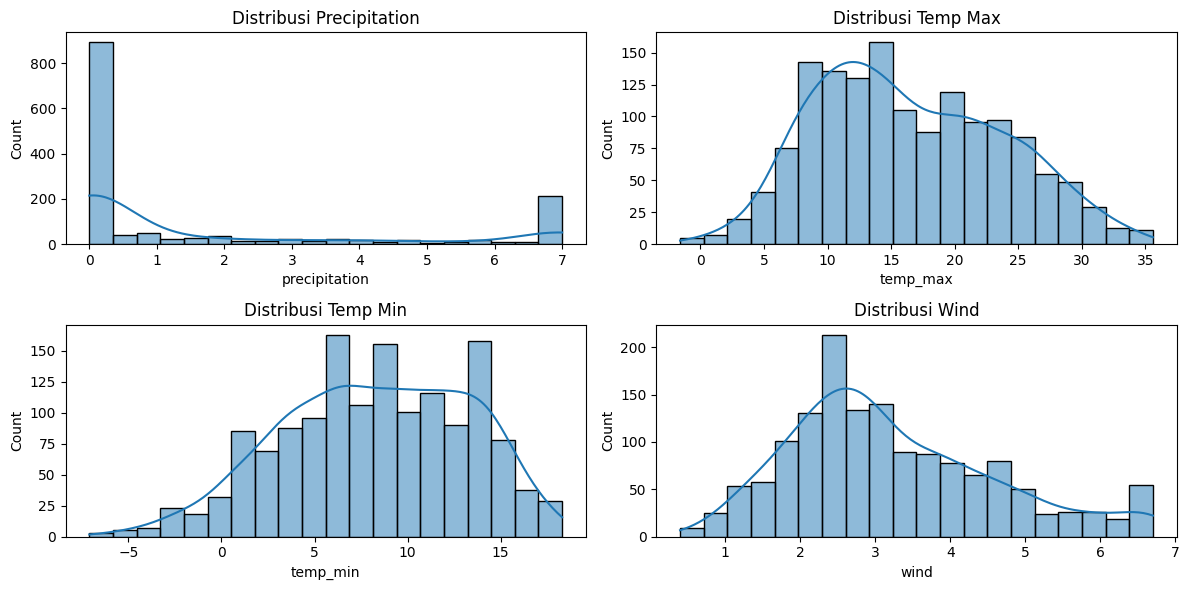

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['precipitation'], bins=20, kde=True)
plt.title('Distribusi Precipitation')

plt.subplot(2, 2, 2)
sns.histplot(df['temp_max'], bins=20, kde=True)
plt.title('Distribusi Temp Max')

plt.subplot(2, 2, 3)
sns.histplot(df['temp_min'], bins=20, kde=True)
plt.title('Distribusi Temp Min')

plt.subplot(2, 2, 4)
sns.histplot(df['wind'], bins=20, kde=True)
plt.title('Distribusi Wind')

plt.tight_layout()
plt.show()

Output menampilkan visualisasi distribusi dari masing-masing fitur numerik.

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.339923 -0.139012  0.358534
temp_max           -0.339923  1.000000  0.875687 -0.160838
temp_min           -0.139012  0.875687  1.000000 -0.069173
wind                0.358534 -0.160838 -0.069173  1.000000


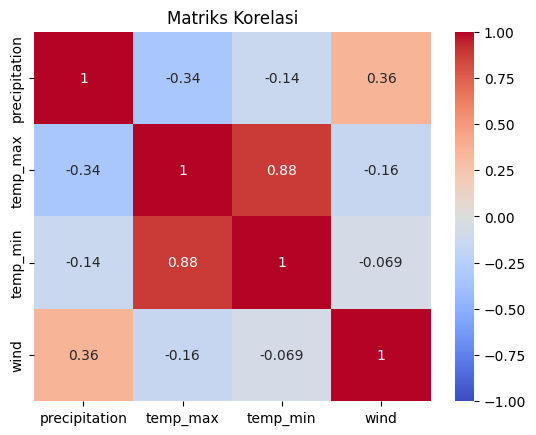

In [21]:
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()


- Terdapat korelasi negatif yang lemah (-0.34) antara tingkat presipitasi ("precipitation") dan suhu maksimum ("temp_max").
- Terdapat korelasi positif yang kuat (0.88) antara suhu maksimum ("temp_max") dan suhu minimum ("temp_min"). 
- Korelasi antara suhu minimum ("temp_min") dan tingkat presipitasi ("precipitation") serta kecepatan angin ("wind") adalah lemah dan mendekati nol, menunjukkan bahwa tidak ada korelasi yang signifikan antara variabel-variabel ini.
- Terdapat korelasi negatif yang lemah (-0.16) antara suhu maksimum ("temp_max") dan kecepatan angin ("wind").

c:\Users\Rezal\miniconda3\envs\main-ds\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


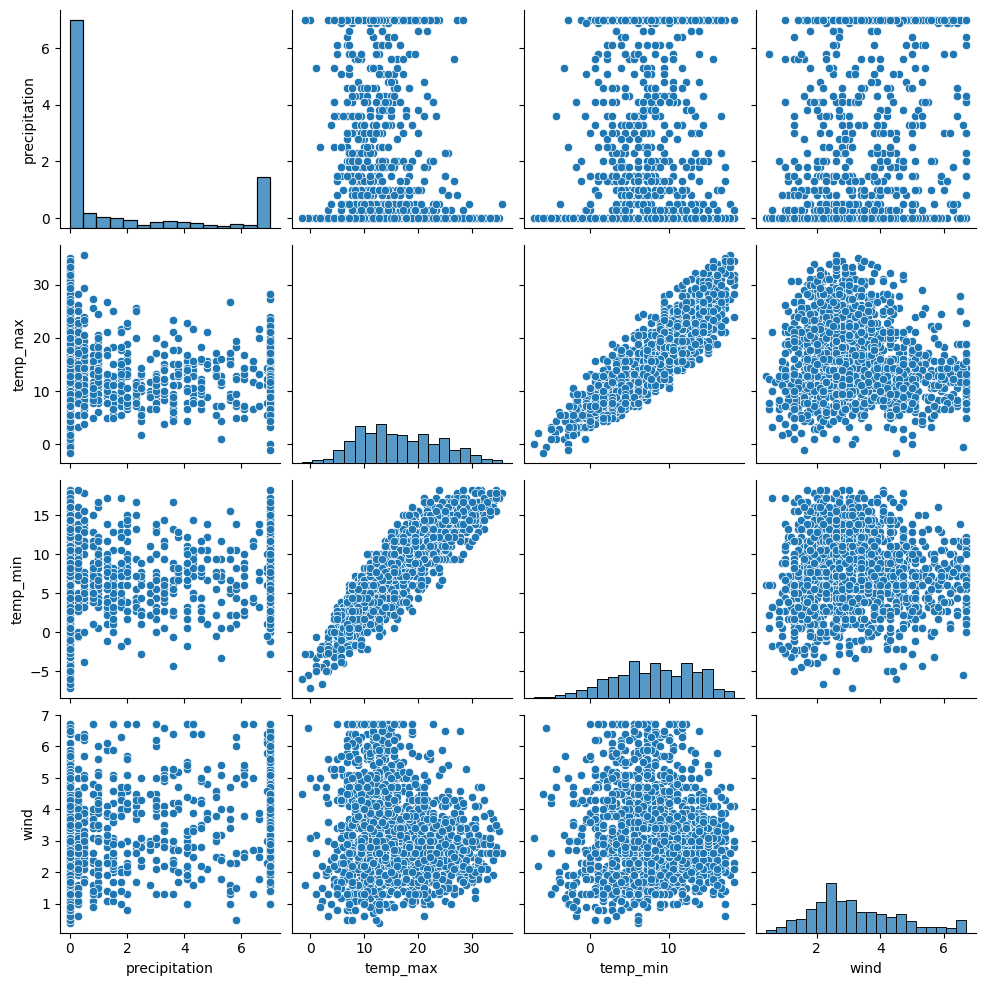

In [29]:
sns.pairplot(df[['precipitation', 'temp_max', 'temp_min', 'wind']])
plt.show()

dengan output ini kita bisa melihat hubungan antara semua pasangan variabel numerik sekaligus